In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Get the data

In [3]:
cwd = os.getcwd()
up1 = os.path.split(cwd)[0]
data_dir = os.path.join(up1,"data")
data = [os.path.join(data_dir,x) for x in os.listdir(data_dir) if x.endswith('.csv') if "cv_wells" in x][0]
data

'/Users/aakashahamed/Desktop/moore/well_failure/neural_net_groundwater/data/cv_wells.csv'

# Define NN model

In [4]:
def baseline_model(X_train):
    model = Sequential()
    model.add(Dense(28, input_dim=56, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
    
    return model

# Setup the data for NN

In [5]:
df = pd.read_csv(data)

In [6]:
# Count the # of failures and sample an equal number of non failures
dry = df[df.dry == 1]
not_dry = df[df.dry != 1]
not_dry = not_dry.sample(n=len(df[df.dry ==1]))
len(dry), len(not_dry)

(2059, 2059)

In [7]:
df = pd.concat([dry,not_dry])

In [8]:
scaler = MinMaxScaler() # Scale the data using sklearn minmax scaler

labels = np.array(df['dry'])

features = df.drop(['dry','name'], axis = 1)
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features = np.array(features)

In [30]:
# Train / Test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 1)
    
# NN naming convention
X_train = np.array(train_features)
X_test = np.array(test_features)
y_train = np.array(train_labels)
y_test = np.array(test_labels)
    
# Fit model
model = baseline_model(X_train)
model.fit(X_train, y_train, epochs=100,verbose=1)
predictions = model.predict(X_test)

Epoch 1/100
3294/3294 [==============================] - 1s 200us/step - loss: 0.6710 - mean_squared_error: 0.2390
Epoch 2/100
3294/3294 [==============================] - 0s 46us/step - loss: 0.6161 - mean_squared_error: 0.2128
Epoch 3/100
3294/3294 [==============================] - 0s 44us/step - loss: 0.6031 - mean_squared_error: 0.2072
Epoch 4/100
3294/3294 [==============================] - 0s 45us/step - loss: 0.5959 - mean_squared_error: 0.2040 0s - loss: 0.5989 - mean_squared_error: 0.
Epoch 5/100
3294/3294 [==============================] - 0s 43us/step - loss: 0.5960 - mean_squared_error: 0.2040
Epoch 6/100
3294/3294 [==============================] - 0s 44us/step - loss: 0.5924 - mean_squared_error: 0.2025
Epoch 7/100
3294/3294 [==============================] - 0s 43us/step - loss: 0.5887 - mean_squared_error: 0.2008
Epoch 8/100
3294/3294 [==============================] - 0s 44us/step - loss: 0.5829 - mean_squared_error: 0.1982
Epoch 9/100
3294/3294 [=====================

3294/3294 [==============================] - 0s 49us/step - loss: 0.5414 - mean_squared_error: 0.1812
Epoch 72/100
3294/3294 [==============================] - 0s 50us/step - loss: 0.5457 - mean_squared_error: 0.1827
Epoch 73/100
3294/3294 [==============================] - 0s 45us/step - loss: 0.5388 - mean_squared_error: 0.1800
Epoch 74/100
3294/3294 [==============================] - 0s 43us/step - loss: 0.5380 - mean_squared_error: 0.1797
Epoch 75/100
3294/3294 [==============================] - 0s 43us/step - loss: 0.5412 - mean_squared_error: 0.1811
Epoch 76/100
3294/3294 [==============================] - 0s 48us/step - loss: 0.5370 - mean_squared_error: 0.1790
Epoch 77/100
3294/3294 [==============================] - 0s 52us/step - loss: 0.5379 - mean_squared_error: 0.1797
Epoch 78/100
3294/3294 [==============================] - 0s 44us/step - loss: 0.5377 - mean_squared_error: 0.1797
Epoch 79/100
3294/3294 [==============================] - 0s 45us/step - loss: 0.5378 - mean_

In [33]:
# Reshape 
predictions = predictions.reshape(predictions.shape[0])

# Take 
preds = []

for i in predictions:
    if i > 0.5: 
        preds.append(1)
    else:
        preds.append(0)

In [34]:
mape = 100. * (np.abs((preds - y_test) / y_test))
np.mean(mape)

11.28640776699029

In [35]:
accuracy = 100. - np.mean(mape)
accuracy

88.713592233009706

# Make a confusion matrix of the predictions 

In [36]:
cm = sklearn.metrics.confusion_matrix(y_test, preds)

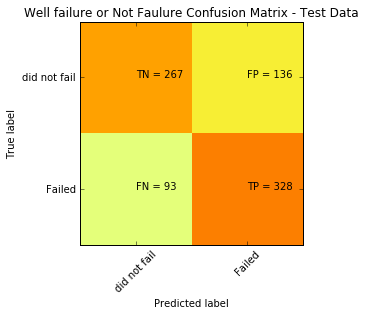

In [37]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['did not fail','Failed']
plt.title('Well failure or Not Faulure Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [38]:
328. / (93.+328.)

0.7790973871733967